# Importing Libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image
plt.style.use('ggplot')
from skimage import io
from sklearn.cluster import KMeans
from ipywidgets import interact,interactive,fixed,interact_manual,IntSlider
import ipywidgets as widgets

In [2]:
plt.rcParams['figure.figsize'] =(20,12)


# Data Preprocessing

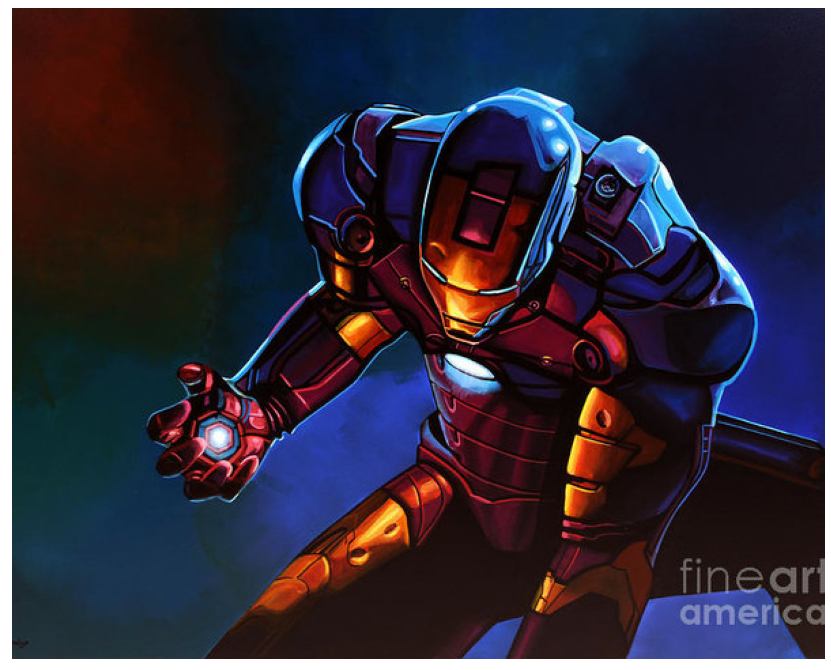

In [3]:
img = io.imread('C:/Users/devro/Desktop/Jupyter/a.jpg')
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(img)

In [4]:
img.shape

(480, 599, 3)

In [5]:
im = (img/255.).reshape(-1,3)
print(im.shape)

(287520, 3)


# Visualizing the color space using point clouds

In [6]:
from plot_utils import plot_utils

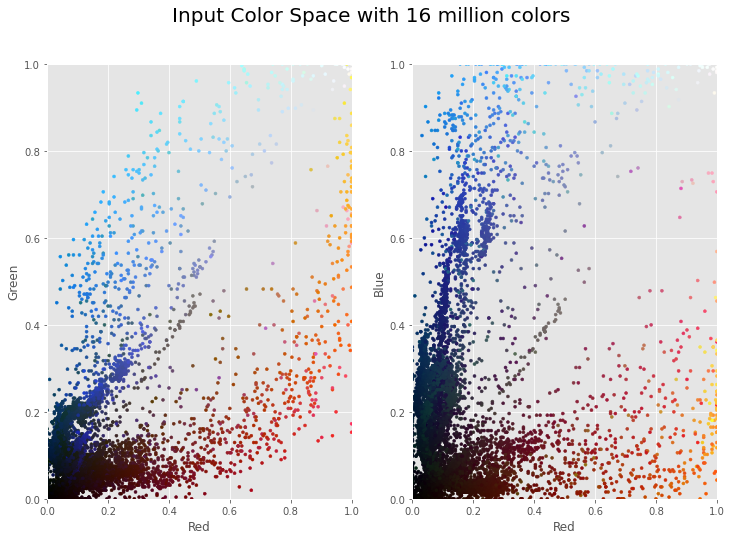

In [7]:
x = plot_utils(im,title='Input Color Space with 16 million colors')
x.colorSpace()

# Visualizing the k-Means reduced color space

C:\Users\devro\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


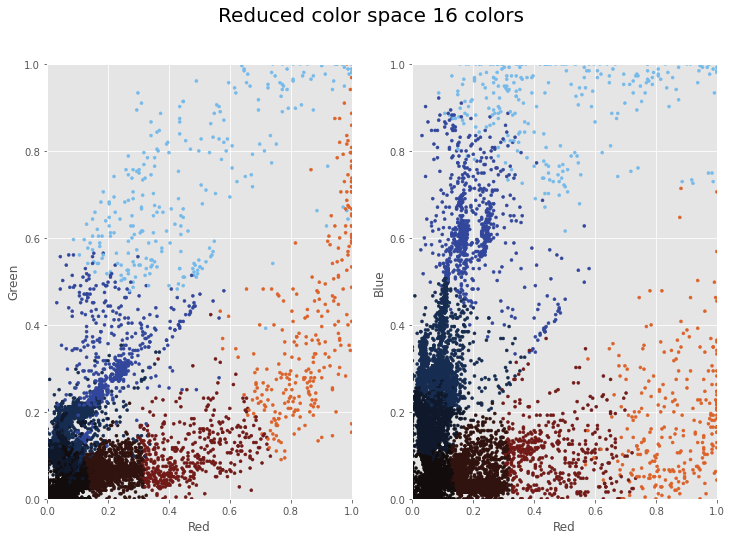

In [8]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans().fit(im)
k_colors = kmeans.cluster_centers_[kmeans.predict(im)]

y = plot_utils(im,colors=k_colors,title="Reduced color space 16 colors")
y.colorSpace()

# KMeans Image compression with interactive controls

In [9]:
@interact
def color_compression(image=os.listdir(img_dir), k=IntSlider(min=1,max=256,step=1,value=16,
                                                             continuous_update=False,
                                                             layout=dict(width='100%'))):
    
    input_img = io.imread(img_dir + image)
    img_data = (input_img / 255.0).reshape(-1, 3)
    
    kmeans = MiniBatchKMeans(k).fit(img_data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]
    #After K-means has converged, load the large image into your program and 
    #replace each of its pixels with the nearest of the centroid colors you found
    #from the small image. 
    k_img = np.reshape(k_colors, (input_img.shape))
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('K-means Image Compression', fontsize=20)
    
    ax1.set_title('Compressed')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    ax2.set_title('Original (16,777,216 colors)')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top=0.85)
    plt.show()

NameError: name 'os' is not defined